In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.readwrite import json_graph

In [2]:
df = pd.read_csv('markup_18.01.2023.csv')
df.head()

,id,Signatory,Organization,Task1.task_text,Date_sig,Title,Task1.task_responsibles_people,Task1.task_responsibles_groups,Task1.task_deadline,Task2.task_text,...,responsibles_people_Task4.,responsibles_people_Task5.,responsibles_people_Task6.,responsibles_people_Task7.,responsibles_people_Task8.,responsibles_people_Task9.,responsibles_people_respon,Nasmes_global_supervisor,Names_global_supervisor,Posts_global_supervisors
0,0,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Закупить книги. Срок завершения: 19 апр 15.,11.4.2013,Приказ,Ответственность за исполнение распоряжения воз...,Административно-хозяйственный отдел,"['19 апр 15', 1429383600.0]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Кравцову И.Е.'],['специалиста первой категории']
1,1,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Провести анализ поставщиков для замены вышедше...,3.6.2013,Приказ,Ответственность за исполнение распоряжения воз...,Служба ИТ,"['24 октября 12', 1351015200.0]",Выполнить ремонт кабеля сети передачи данных м...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Кима Юрия Ивановича', 'Сергеева Андрея', 'Ко...","['специалиста третьей категории', 'системного ..."
2,2,генеральный директор Созонов С.В.,"ООО ""Мегасофт""",Провести рефакторинг программного обеспечения ...,8.10.2014,Приказ,Контроль над исполнением распоряжения оставить...,Отдел разработки систем,"['24.12.20', 1608750000.0]",Провести рефакторинг программного обеспечения ...,...,технического писателя,специалистом третьей категории,специалиста третьей категории,NaN,NaN,NaN,NaN,NaN,"['Абаимовым Симоном', 'Ответственным', 'Абаимо...","['тимлидами проектной команды', 'тимлид проект..."
3,3,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Оплатить командировочные расходы.\nОпределить ...,10.12.18,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['26 июля 2019 г.', 1564081200.0]",Провести аудит персональных данных в информаци...,...,специалиста второй категории,специалиста второй категории,NaN,NaN,NaN,NaN,NaN,NaN,"['Смирнову', 'Смирнову О.А.']","['специалиста третей категории', 'специалиста ..."
4,4,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Согласовать смету на выполнение работ компание...,19.03.2016,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['12 янв 2019 г.', 1547233200.0]",Выделить средства на проведение обучения.\nУст...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Ответственным', 'Смирнову О.А.']",['специалиста второй категории']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10000 non-null  int64  
 1   Signatory                       10000 non-null  object 
 2   Organization                    10000 non-null  object 
 3   Task1.task_text                 10000 non-null  object 
 4   Date_sig                        10000 non-null  object 
 5   Title                           10000 non-null  object 
 6   Task1.task_responsibles_people  10000 non-null  object 
 7   Task1.task_responsibles_groups  10000 non-null  object 
 8   Task1.task_deadline             10000 non-null  object 
 9   Task2.task_text                 8914 non-null   object 
 10  Task2.task_responsibles_people  8914 non-null   object 
 11  Task2.task_responsibles_groups  8914 non-null   object 
 12  Task2.task_deadline             8

создадим отдельный датафрейм с перечнем департаментов, сотрудников, их должностей и выполняемых задач

In [4]:
triplets = [
    ['Task1.task_responsibles_groups', 'responsibles_people_Task1.', 'executor_Task1.','Task1.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task2.', 'executor_Task2.','Task2.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task3.', 'executor_Task3.','Task3.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task4.', 'executor_Task4.','Task4.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task5.', 'executor_Task5.','Task5.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task6.', 'executor_Task6.','Task6.task_text'],
    ['Task1.task_responsibles_groups', 'responsibles_people_Task7.', 'executor_Task7.','Task7.task_text'],
    ['Task8.task_responsibles_groups', 'responsibles_people_Task8.', 'executor_Task8.','Task8.task_text'],
    ['Task9.task_responsibles_groups', 'responsibles_people_Task9.', 'executor_Task9.','Task9.task_text'],
]
dataframes = [df[columns] for columns in triplets]

for dataframe in dataframes:
    dataframe.columns = ["Департамент", "Должность", "ФИО", "Задачи"]

df = pd.concat(dataframes, ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Департамент  73437 non-null  object
 1   Должность    43414 non-null  object
 2   ФИО          39602 non-null  object
 3   Задачи       50455 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


удалим строки с пропусками

In [6]:
df = df.dropna(axis=0)
df.index = range(len(df))
df

,Департамент,Должность,ФИО,Задачи
0,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Закупить книги. Срок завершения: 19 апр 15.
1,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Провести анализ поставщиков для замены вышедше...
2,Отдел разработки систем,тимлидами проектной команды,Абаимовым Симоном,Провести рефакторинг программного обеспечения ...
3,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Выполнить сверку расчетов с компаниями-пордядч...
4,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Провести анализ неисправности работы API и обе...
...,...,...,...,...
37911,Отдел проектирования,специалиста третьей категории,Коптелова,"Завершить проектирование системы, с учетом тре..."
37912,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Провести выплату заработной платы.\nОпределить...
37913,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Заменить лампы дневного освещения.\nУстановить...
37914,Отдел проектирования,специалиста третьей категории,Коптелова,Добавить модуль расширения системы в проект.\n...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37916 entries, 0 to 37915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Департамент  37916 non-null  object
 1   Должность    37916 non-null  object
 2   ФИО          37916 non-null  object
 3   Задачи       37916 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [8]:
print(f'Количество департаментов: {df["Департамент"].nunique()}')
print()
print(f'Список департаментов: {(df["Департамент"].unique())}')
print()
print(f'Количество сотрудников: {df["ФИО"].nunique()}')

Количество департаментов: 8

Список департаментов: ['Административно-хозяйственный отдел' 'Служба ИТ'
 'Отдел разработки систем' 'Бухгалтерия' 'Отдел проектирования'
 'Отдел архитектуры' 'Отдел эксплуатации' 'Отдел тестирования']

Количество сотрудников: 58


посмотрим на количество упоминаний департаментов и сотрудников в документах

In [9]:
df.groupby('Департамент').count()

,Должность,ФИО,Задачи
Департамент,,,
Административно-хозяйственный отдел,8025,8025,8025
Бухгалтерия,8392,8392,8392
Отдел архитектуры,1673,1673,1673
Отдел проектирования,1603,1603,1603
Отдел разработки систем,7695,7695,7695
Отдел тестирования,1673,1673,1673
Отдел эксплуатации,2184,2184,2184
Служба ИТ,6671,6671,6671


In [10]:
df.groupby('Должность').count()

,Департамент,ФИО,Задачи
Должность,,,
администратора баз,797,797,797
администратора баз данных,808,808,808
администратора вычислительной,441,441,441
администратора вычислительной сети,445,445,445
администратором вычислительной,103,103,103
архитектора программного обеспечения,555,555,555
главного бухгалтера,2044,2044,2044
мастера по ремонту компьютеров,869,869,869
мастером по ремонту компьютеров,115,115,115


In [11]:
df.groupby('ФИО').count()

,Департамент,Должность,Задачи
ФИО,,,
Абаимова Симона,745,745,745
Абаимовым Симоном,84,84,84
Абакова,134,134,134
Абакова Алексея,118,118,118
Абакулова Петра,904,904,904
Абакумова Глеба,273,273,273
Абалакина Михаила,869,869,869
Абалакиным Михаилом,115,115,115
Абалакова Севастьяна,436,436,436


In [12]:
#Проверка на дублирование строк
df.duplicated().sum()

3

удалим дубликаты из датафрейма и создадим новый датафрейм

In [13]:
df_unique = df.drop_duplicates()
df_unique.shape

(37913, 4)

посмотрим на распределние сотрудников по депарматентам

In [14]:
df_unique.groupby('Департамент').count()

,Должность,ФИО,Задачи
Департамент,,,
Административно-хозяйственный отдел,8025,8025,8025
Бухгалтерия,8390,8390,8390
Отдел архитектуры,1673,1673,1673
Отдел проектирования,1603,1603,1603
Отдел разработки систем,7695,7695,7695
Отдел тестирования,1672,1672,1672
Отдел эксплуатации,2184,2184,2184
Служба ИТ,6671,6671,6671


In [15]:
departments = df_unique['Департамент'].unique()

In [16]:
for department in departments:
    display(df_unique[df_unique['Департамент'] == department])

,Департамент,Должность,ФИО,Задачи
0,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Закупить книги. Срок завершения: 19 апр 15.
8,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,"Уточнить список сотрудников, имеющих право на ..."
11,Административно-хозяйственный отдел,руководителя Административно-хозяйственного,С.С.Галкина,Обеспечить комфортные условия для работы сотру...
17,Административно-хозяйственный отдел,руководителя Административно-хозяйственного,С.С.Галкина,Подготовить информационные материалы о компани...
19,Административно-хозяйственный отдел,специалиста первой категории,Сергееву,Провести ревизию мест хранения документации. Д...
...,...,...,...,...
37899,Административно-хозяйственный отдел,руководителя Административно-хозяйственного,С.С.Галкина,Осуществить ремонт вышедшей из строя мебели.\n...
37900,Административно-хозяйственный отдел,специалиста первой категории,Сергееву,Заменить лампы дневного освещения.\nПривести в...
37906,Административно-хозяйственный отдел,специалиста первой категории,Сергееву,Закупить бумагу для принтера.\nСрок завершения...
37908,Административно-хозяйственный отдел,специалиста второй категории,Поспелову,Организовать доставку продуктов питания в офис...


,Департамент,Должность,ФИО,Задачи
1,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Провести анализ поставщиков для замены вышедше...
6,Служба ИТ,администратора баз,Абакулова Петра,Организовать VPN соединение для взаимодействия...
23,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Обеспечить безопасный удаленный доступ для сот...
29,Служба ИТ,администратора вычислительной сети,Абалдуева Олега,Провести централизованную смену паролей для до...
32,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Организовать VPN соединение для взаимодействия...
...,...,...,...,...
37886,Служба ИТ,специалистом первой категории,Александровым Александром Ивановичем,Установить дополнительное аппаратное обеспечен...
37887,Служба ИТ,мастера по ремонту компьютеров,Абалакина Михаила,Закупить необходимое количество клавиатур и ма...
37904,Служба ИТ,мастера по ремонту компьютеров,Абалакина Михаила,Оказать содействие в поддержке инфраструктуры ...
37905,Служба ИТ,администратора вычислительной,Абалдуева Олега,Передать на гарантийный ремон неисправные ноут...


,Департамент,Должность,ФИО,Задачи
2,Отдел разработки систем,тимлидами проектной команды,Абаимовым Симоном,Провести рефакторинг программного обеспечения ...
4,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Провести анализ неисправности работы API и обе...
5,Отдел разработки систем,специалиста второй категории,Попова А.А.,Добавить дополнительных механизм авторизации п...
10,Отдел разработки систем,специалиста второй категории,Попова А.А.,Провести рабочее совещание для формирования тр...
13,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Проанализировать требования тендерной документ...
...,...,...,...,...
37892,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Провести рефакторинг программного обеспечения ...
37901,Отдел разработки систем,тимлид проектной команды,Абаимова Симона,Провести тестирование разработанного модуля. В...
37902,Отдел разработки систем,технического писателя,Абалкина Зураба,Интегрировать в систему модуль мониторинга для...
37903,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Подготовить юнит тесты для разработанных функц...


,Департамент,Должность,ФИО,Задачи
3,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Выполнить сверку расчетов с компаниями-пордядч...
12,Бухгалтерия,специалиста первой категории,Миронову Т.П.,Устранить полученные замечания налоговой служб...
14,Бухгалтерия,главного бухгалтера,Семенову М.С.,Произвести расчет и выплату премии. Срок завер...
20,Бухгалтерия,специалиста третей категории,Александрова А.С.,Провести конкурс на выбор компании аудитора.\n...
26,Бухгалтерия,специалиста третей категории,Александрова А.С.,Подготовить балансовый отчет за период. Сроком...
...,...,...,...,...
37890,Бухгалтерия,специалистом третей категории,Александровым А.С.,Провести обучение для повышения квалификации с...
37893,Бухгалтерия,главного бухгалтера,Семенову М.С.,Провести аудит персональных данных в информаци...
37909,Бухгалтерия,специалиста третей категории,Александрова А.С.,Предоставить сотрудникам справки 2-НДФЛ. Срок ...
37910,Бухгалтерия,специалиста первой категории,Миронову Т.П.,Согласовать смету на выполнение работ компание...


,Департамент,Должность,ФИО,Задачи
7,Отдел проектирования,специалиста второй категории,Попова И.И.,Сохранить проектную документацию в архиве. Опр...
15,Отдел проектирования,специалиста первой категории,Семенова И.А.,Подготовить спецификацию проекта для формирова...
16,Отдел проектирования,специалистом второй категории,Поповым И.И.,Подготовить спецификацию проекта для формирова...
25,Отдел проектирования,специалиста второй категории,Попова И.И.,Внести изменения в техническую документацию пр...
58,Отдел проектирования,специалиста первой категории,Семенова И.А.,Организовать обучение сотрудников правилам про...
...,...,...,...,...
37779,Отдел проектирования,специалиста второй категории,Попова И.И.,Проанализировать требования законодательства в...
37871,Отдел проектирования,специалиста третьей категории,Коптелова,Подготовить спецификацию необходимого аппаратн...
37896,Отдел проектирования,специалиста третьей категории,Коптелова,Оказать содействие в подготовке пользовательск...
37911,Отдел проектирования,специалиста третьей категории,Коптелова,"Завершить проектирование системы, с учетом тре..."


,Департамент,Должность,ФИО,Задачи
9,Отдел архитектуры,специалиста третьей категории,Слесарева А.В,Провести замену используемых компонентов архит...
48,Отдел архитектуры,технического писателя,Абакумова Глеба,Проанализировать проблему нехватки оперативной...
116,Отдел архитектуры,специалиста первой категории,Миронова К.А.,Уменьшить объем используемой оперативной памят...
129,Отдел архитектуры,специалиста первой категории,Миронова К.А.,Провести анализ оптимальности используемой арх...
133,Отдел архитектуры,архитектора программного обеспечения,Абакова Алексея,Провести обучение сотрудников правилам создани...
...,...,...,...,...
37834,Отдел архитектуры,архитектора программного обеспечения,Абакова,Внести изменения в проектную документацию с уч...
37857,Отдел архитектуры,технического писателя,Абакумова Глеба,Дать предложения по рефакторингу системы для у...
37866,Отдел архитектуры,архитектора программного обеспечения,Абакова,Провести замену используемых компонентов архит...
37891,Отдел архитектуры,специалиста первой категории,Миронова К.А.,Принять участие в нагрузочных испытаниях систе...


,Департамент,Должность,ФИО,Задачи
21,Отдел эксплуатации,специалиста второй категории,Ведерникова И.С.,Провести срочный ремонт и устранение неполадок...
24,Отдел эксплуатации,специалиста третьей категории,Жукова,Организовать поддержку интеграции системы со с...
54,Отдел эксплуатации,специалиста третьей категории,Жукова,Провести пилотный проект для демонстрации возм...
61,Отдел эксплуатации,специалистом первой категории,Ивановым А.А.,Организовать поддержку заказчика при эксплуата...
112,Отдел эксплуатации,специалиста второй категории,Ведерникова И.С.,Провести пилотный проект для демонстрации возм...
...,...,...,...,...
37784,Отдел эксплуатации,специалиста третьей категории,Жукова,Организовать поддержку интеграции системы со с...
37793,Отдел эксплуатации,руководителя отдела эксплуатации,Точнова С.О.,Организовать поддержку заказчика при эксплуата...
37808,Отдел эксплуатации,специалиста второй категории,Ведерникова И.С.,Провести обучение сотрудников работе с системо...
37863,Отдел эксплуатации,специалистом третьей категории,Жуковым А.В,Организовать поддержку интеграции системы со с...


,Департамент,Должность,ФИО,Задачи
106,Отдел тестирования,специалиста второй категории,Анненкова И.С.,Провести анализ появления ошибки в работе сист...
178,Отдел тестирования,специалистом второй категории,Анненковым И.С.,Подготовить юнит тесты для новых модулей систе...
240,Отдел тестирования,специалиста первой категории,Янина И.А.,Включить представителя в рабочую группу для по...
246,Отдел тестирования,специалиста второй категории,Анненкова И.С.,Протестировать API для интеграции со сторонней...
249,Отдел тестирования,специалиста третьей категории,Спецова,Провести анализ появления ошибки в работе сист...
...,...,...,...,...
37798,Отдел тестирования,специалиста первой категории,Янина И.А.,Внедрить в эксплуатацию обновленную систему мо...
37820,Отдел тестирования,специалистом второй категории,Анненковым И.С.,Подготовить и направить участника рабочей груп...
37852,Отдел тестирования,специалиста второй категории,Анненкова И.С.,Подготовить скрипты автоматизации для проведен...
37862,Отдел тестирования,специалистом второй категории,Анненковым И.С.,Назначить ответственного за эксплуатацию тесто...


In [17]:
df_unique

,Департамент,Должность,ФИО,Задачи
0,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Закупить книги. Срок завершения: 19 апр 15.
1,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Провести анализ поставщиков для замены вышедше...
2,Отдел разработки систем,тимлидами проектной команды,Абаимовым Симоном,Провести рефакторинг программного обеспечения ...
3,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Выполнить сверку расчетов с компаниями-пордядч...
4,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Провести анализ неисправности работы API и обе...
...,...,...,...,...
37911,Отдел проектирования,специалиста третьей категории,Коптелова,"Завершить проектирование системы, с учетом тре..."
37912,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Провести выплату заработной платы.\nОпределить...
37913,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Заменить лампы дневного освещения.\nУстановить...
37914,Отдел проектирования,специалиста третьей категории,Коптелова,Добавить модуль расширения системы в проект.\n...


Обновим индексы строк

In [18]:
df_unique.index = range(len(df_unique))
df_unique

,Департамент,Должность,ФИО,Задачи
0,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Закупить книги. Срок завершения: 19 апр 15.
1,Служба ИТ,специалиста третьей категории,Кима Юрия Ивановича,Провести анализ поставщиков для замены вышедше...
2,Отдел разработки систем,тимлидами проектной команды,Абаимовым Симоном,Провести рефакторинг программного обеспечения ...
3,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Выполнить сверку расчетов с компаниями-пордядч...
4,Отдел разработки систем,специалиста третьей категории,Андреева С.Е.,Провести анализ неисправности работы API и обе...
...,...,...,...,...
37908,Отдел проектирования,специалиста третьей категории,Коптелова,"Завершить проектирование системы, с учетом тре..."
37909,Бухгалтерия,специалиста второй категории,Смирнову О.А.,Провести выплату заработной платы.\nОпределить...
37910,Административно-хозяйственный отдел,специалиста первой категории,Кравцову И.Е.,Заменить лампы дневного освещения.\nУстановить...
37911,Отдел проектирования,специалиста третьей категории,Коптелова,Добавить модуль расширения системы в проект.\n...


Инициирование направленного графа структуры компании

In [19]:
G_structure = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [20]:
G_structure.clear()

In [21]:
list(G_structure)

[]

Создание связей между компанией и отделами

In [22]:
for ind in range(len(df_unique['Департамент'])):
    if G_structure.has_edge('ООО "Мегасофт"', df_unique['Департамент'][ind]):
        continue           
    G_structure.add_edge('ООО "Мегасофт', df_unique['Департамент'][ind])

Визуализация графа G_structure

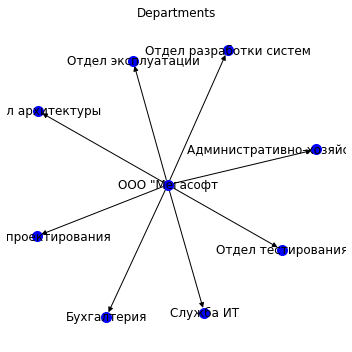

In [23]:
fig = plt.figure(figsize=(5, 5))

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

plt.title("Departments")
pos=nx.spring_layout(G_structure)
nx.draw_networkx(G_structure, pos=pos, arrows=True, **options)

plt.tight_layout()
plt.axis('off') 
plt.show()

In [24]:
department_list = []
for n, nbrs in G_structure.adj.items():
    for nbr, eattr in nbrs.items():
        department_list.append(nbr)

In [25]:
print('Количество отделов: ', len(department_list))

Количество отделов:  8


In [26]:
print(f'Список отделов: {department_list}')

Список отделов: ['Административно-хозяйственный отдел', 'Служба ИТ', 'Отдел разработки систем', 'Бухгалтерия', 'Отдел проектирования', 'Отдел архитектуры', 'Отдел эксплуатации', 'Отдел тестирования']


Инициирование направленного графа персонала с привязкой к отделам и заданием в атрибуте должности

In [27]:
G_personal = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [28]:
G_personal.clear()

In [29]:
list(G_personal)

[]

In [30]:
for ind in range(len(df_unique['ФИО'])):
    if G_personal.has_edge(df_unique['Департамент'][ind], df_unique['ФИО'][ind]):
        continue
    G_personal.add_edge(df_unique['Департамент'][ind], df_unique['ФИО'][ind])
    G_personal.nodes[df_unique['ФИО'][ind]]['position'] = df_unique['Должность'][ind]
    G_personal.nodes[df_unique['ФИО'][ind]]['task'] = df_unique['Задачи'][ind]

Визуализируем

In [31]:
departments = list(df_unique['Департамент'].unique())

In [32]:
left_nodes = departments.copy()

In [33]:
left_nodes

['Административно-хозяйственный отдел',
 'Служба ИТ',
 'Отдел разработки систем',
 'Бухгалтерия',
 'Отдел проектирования',
 'Отдел архитектуры',
 'Отдел эксплуатации',
 'Отдел тестирования']

In [34]:
right_nodes = []
for d in range(len(departments)):
    for p in range(len(list(G_personal[departments[d]]))):
        right_nodes.append((list(G_personal[departments[d]])[p]))

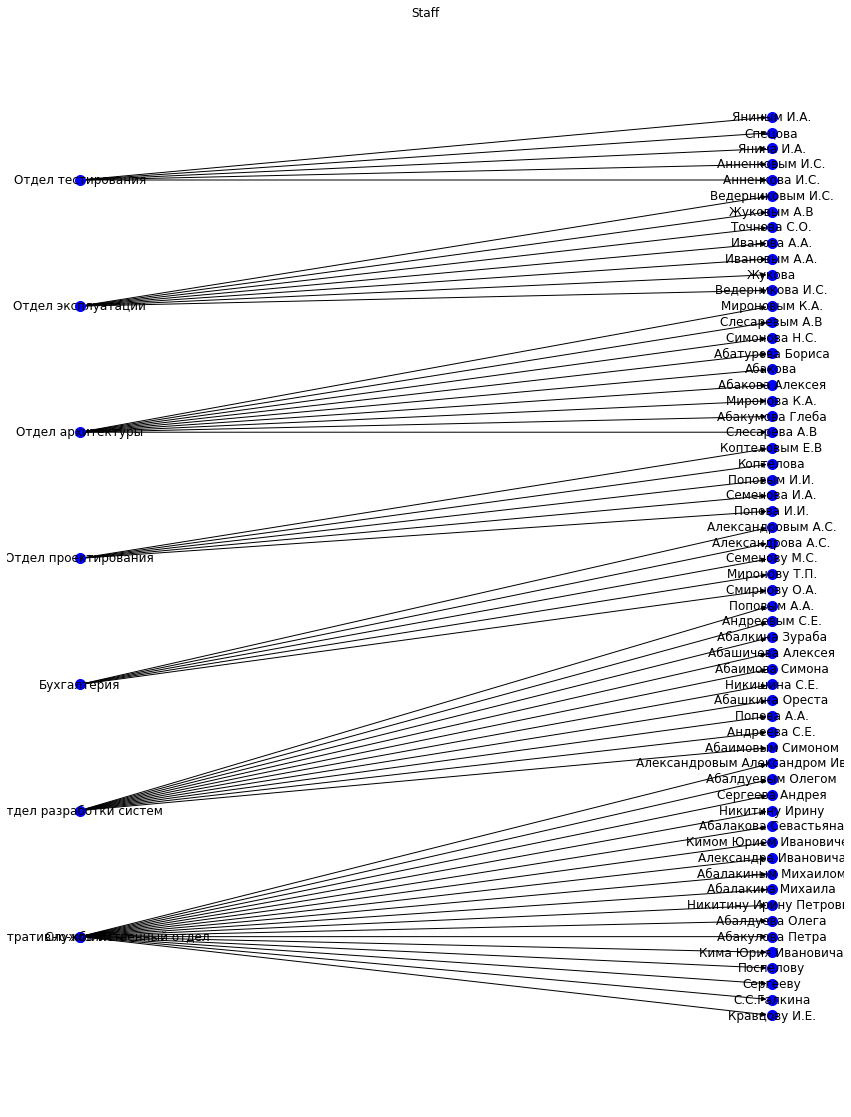

In [35]:
fig = plt.figure(figsize=(15, 20))

plt.title("Staff")

pos = {left_nodes[0]: (0, 5)}
pos.update({n: (0, i * 8 + 5) for i, n in enumerate(left_nodes[1:])})
pos.update({n: (1, i) for i, n in enumerate(right_nodes)})

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

nx.draw(G_personal, pos=pos, arrows=True,**options)
plt.axis('off') 
plt.show()

In [36]:
personal_list = []
position_list = []
task_list = []
for n, nbrs in G_personal.adj.items():
    for nbr, eattr in nbrs.items():
        personal_list.append(nbr)
        position_list.append(G_personal.nodes[nbr]['position'])
        task_list.append(G_personal.nodes[nbr]['task'])

In [37]:
print('Количество персонала: ', len(personal_list))

Количество персонала:  58


In [38]:
print(f'Список персонала: {personal_list}')

Список персонала: ['Кравцову И.Е.', 'С.С.Галкина', 'Сергееву', 'Поспелову', 'Кима Юрия Ивановича', 'Абакулова Петра', 'Абалдуева Олега', 'Никитину Ирину Петровну', 'Абалакина Михаила', 'Абалакиным Михаилом', 'Александра Ивановича', 'Кимом Юрием Ивановичем', 'Абалакова Севастьяна', 'Никитину Ирину', 'Сергеева Андрея', 'Абалдуевым Олегом', 'Александровым Александром Ивановичем', 'Абаимовым Симоном', 'Андреева С.Е.', 'Попова А.А.', 'Абашкина Ореста', 'Никишина С.Е.', 'Абаимова Симона', 'Абашичева Алексея', 'Абалкина Зураба', 'Андреевым С.Е.', 'Поповым А.А.', 'Смирнову О.А.', 'Миронову Т.П.', 'Семенову М.С.', 'Александрова А.С.', 'Александровым А.С.', 'Попова И.И.', 'Семенова И.А.', 'Поповым И.И.', 'Коптелова', 'Коптеловым Е.В', 'Слесарева А.В', 'Абакумова Глеба', 'Миронова К.А.', 'Абакова Алексея', 'Абакова', 'Абатурова Бориса', 'Симонова Н.С.', 'Слесаревым А.В', 'Мироновым К.А.', 'Ведерникова И.С.', 'Жукова', 'Ивановым А.А.', 'Иванова А.А.', 'Точнова С.О.', 'Жуковым А.В', 'Ведерниковым И

In [39]:
print(f'Список должностей: {set(position_list)}')

Список должностей: {'специалистом третей категории', 'специалистом первой категории', 'главного бухгалтера', 'специалиста третьей категории', 'специалистом второй категории', 'мастера по ремонту компьютеров', 'тимлид проектной команды', 'специалиста второй категории', 'специалиста третей категории', 'программиста', 'архитектора программного обеспечения', 'руководителя отдела эксплуатации', 'администратора вычислительной сети', 'специалиста первой категории', 'технического писателя', 'руководителя Административно-хозяйственного', 'администратора баз', 'мастером по ремонту компьютеров', 'специалистом третьей категории', 'тимлидами проектной команды', 'администратором вычислительной', 'системного администратора'}


In [40]:
print(f'Кол-во уникальных должностей: {len(set(position_list))}')

Кол-во уникальных должностей: 22


In [41]:
print(f'Кол-во задач: {len(task_list)}')

Кол-во задач: 58


In [42]:
print(f'Кол-во уникальных задач: {len(set(task_list))}')

Кол-во уникальных задач: 58


Создание графа компании

In [43]:
G_company = nx.compose(G_structure, G_personal)

Очистка графа (при необходимости пересоздания)

In [149]:
G_company.clear()

In [150]:
list(G_company)

[]

Сохраним созданные графы в файлы, чтобы потом можно было использовать

In [ ]:
nx.write_gpickle(G_structure, "Structure.gpickle")
nx.write_gpickle(G_personal, "Personal.gpickle")
nx.write_gpickle(G_company, "Company.gpickle")

Прочитать граф из файла

In [ ]:
G_structure_load = nx.read_gpickle("Structure.gpickle")

Сохранение графа в json

In [44]:
G_company_dict = json_graph.node_link_data(G_company)

In [45]:
with open('Company.json', 'w') as f:
    json.dump(G_company_dict, f, ensure_ascii=False, indent=4)

Проверка наличия сущности в компании

In [ ]:
ner in G_company

Проверка связи одной сущности с другой (например, отдел-сотрудник)

In [ ]:
ner1, ner2 in G_company.edges

Проверка соответствия характеристик сущности (например, соотвествие сотрудника такой-то должности)

In [46]:
G_company.nodes['Кравцову И.Е.']

{'position': 'специалиста первой категории',
 'task': 'Закупить книги. Срок завершения: 19 апр 15.'}

In [47]:
G_company.nodes['Кравцову И.Е.']['position'] == 'специалиста первой категории'

True

In [48]:
G_company.nodes['Кравцову И.Е.']['position'] == 'специалиста второй категории'

False